In [2]:
import numpy as np
import pandas as pd
import re 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from scipy import optimize
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
import string
from scipy.io import loadmat
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from utils import data_splitter,text_process,count_freqs
import sklearn as sk


C:\Users\Lales\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lales\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Lales\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
X_train, X_test, y_train, y_test,train_lab,test_lab = data_splitter('resources/dataset.csv')

In [4]:
X_train[0]

'Why did the composer spend all his time in  bed? he wrote sheet music.'

In [5]:
text_process(X_train[0])

['compos', 'spend', 'time', 'bed', 'wrote', 'sheet', 'music']

## Vectorization


In [6]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X_train)

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

48200


In [8]:
bow0 = bow_transformer.transform([X_train[0]])
print(bow0)
print(bow0.shape)

  (0, 5430)	1
  (0, 10107)	1
  (0, 28817)	1
  (0, 38235)	1
  (0, 39868)	1
  (0, 42607)	1
  (0, 46867)	1
(1, 48200)


In [9]:
text_bow_train = bow_transformer.transform(X_train)
text_bow_test = bow_transformer.transform(X_test)

In [10]:
print('Shape of Sparse Matrix: ', text_bow_train.shape)
print('Amount of Non-Zero occurences: ', text_bow_train.nnz)
sparsity = (100.0 * text_bow_train.nnz / (text_bow_train.shape[0] * text_bow_train.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

Shape of Sparse Matrix:  (160000, 48200)
Amount of Non-Zero occurences:  1146148
sparsity: 0


## Term Frequency-Inverse Document Frequency(TF-IDF)

In [11]:
tfidf_transformer = TfidfTransformer().fit(text_bow_train)
text_tfidf_train=tfidf_transformer.transform(text_bow_train)
text_tfidf_test=tfidf_transformer.transform(text_bow_test)
print(text_tfidf_train.shape)

(160000, 48200)


## Training NaiveBayes models

In [22]:
from sklearn.naive_bayes import BernoulliNB

bernoulli_nb =  BernoulliNB(alpha=.5)
bernoulli_nb.fit(text_bow_train, y_train)

BernoulliNB(alpha=0.5)

In [23]:
y_preds = bernoulli_nb.predict(text_bow_test)
print('Test Accuracy : %.3f'%bernoulli_nb.score(text_bow_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training Accuracy : %.3f'%bernoulli_nb.score(text_bow_train, y_train))


Test Accuracy : 0.900
Training Accuracy : 0.917


In [21]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],}

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(text_bow_train, y_train)

print('Train Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(text_bow_train, y_train))
print('Test Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(text_bow_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%bernoulli_nb_grid.best_score_)
print('Best Parameters : ',bernoulli_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train Accuracy : 0.917
Test Accuracy : 0.900
Best Accuracy Through Grid Search : 0.899
Best Parameters :  {'alpha': 0.5}


In [31]:
from sklearn.naive_bayes import ComplementNB

complement_nb = ComplementNB()

In [34]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],}

bernoulli_nb_grid = GridSearchCV(ComplementNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(text_bow_train, y_train)

print('Train Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(text_bow_train, y_train))
print('Test Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(text_bow_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%bernoulli_nb_grid.best_score_)
print('Best Parameters : ',bernoulli_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train Accuracy : 0.917
Test Accuracy : 0.901
Best Accuracy Through Grid Search : 0.899
Best Parameters :  {'alpha': 0.5}


In [36]:
from sklearn.naive_bayes import MultinomialNB

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],}

bernoulli_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(text_bow_train, y_train)

print('Train Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(text_bow_train, y_train))
print('Test Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(text_bow_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%bernoulli_nb_grid.best_score_)
print('Best Parameters : ',bernoulli_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train Accuracy : 0.917
Test Accuracy : 0.901
Best Accuracy Through Grid Search : 0.899
Best Parameters :  {'alpha': 0.5}


In [37]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()), 
    ('classifier', GridSearchCV(MultinomialNB(),param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],},refit=True,verbose=3))
])

In [38]:
pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........................alpha=0.01;, score=0.887 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;, score=0.889 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.887 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.885 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.885 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.892 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.894 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.893 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.891 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.891 total time=   0.0s
[CV 1/5] END .........................alpha=0.5;, score=0.896 total time=   0.0s
[CV 2/5] END .........................alpha=0.5;,

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D3E01714C8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 GridSearchCV(estimator=MultinomialNB(),
                              param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
                              verbose=3))])

In [41]:
predictions = pipeline.predict(X_test)

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90     20000
         1.0       0.89      0.91      0.90     20000

    accuracy                           0.90     40000
   macro avg       0.90      0.90      0.90     40000
weighted avg       0.90      0.90      0.90     40000



In [43]:
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar();
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

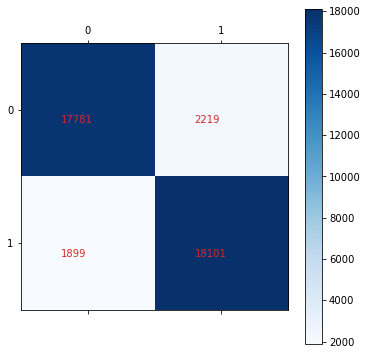

In [46]:
plot_confusion_matrix(y_test, predictions)
